In [34]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

['bank-full.csv']


In [35]:
df = pd.read_csv('../input/bank-full.csv',delimiter=';')

In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:
#Converting objects to category
for i in df.select_dtypes('object'):
    df[i] = df[i].astype('category')

y = df.y
df = df.drop(columns = ['y'])


df_cat_1hot = pd.get_dummies(df.select_dtypes('category'))
df_non_cat = df.select_dtypes(exclude = 'category')

df_data_1hot = pd.concat([df_non_cat, df_cat_1hot], axis=1, join='inner')

In [40]:
df_data_1hot.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [41]:
df_data_1hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_divorced       45211 non-null uint8
marital_mar

In [ ]:
#Converting Categorical variables into Quantitative variables
#print(set(df['job']))
# df['job'] = df['job'].map({'unknown': 0, 'student': 1, 'housemaid': 2, 
#                                                         'unemployed': 3, 'technician': 4, 'admin.': 5,
#                                                         'retired': 6, 'services': 7, 
#                                                         'management': 8, 'entrepreneur': 9, 'blue-collar': 10, 
#                                                         'self-employed': 11}).astype(int)

In [ ]:
# print(set(df['marital']))
# df['marital'] = df['marital'].map({'divorced': 0, 'single': 1, 
#                                                              'married': 2}).astype(int)

In [8]:
df.shape

(45211, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
dtypes: category(9), int64(7)
memory usage: 2.8 MB


In [11]:
y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


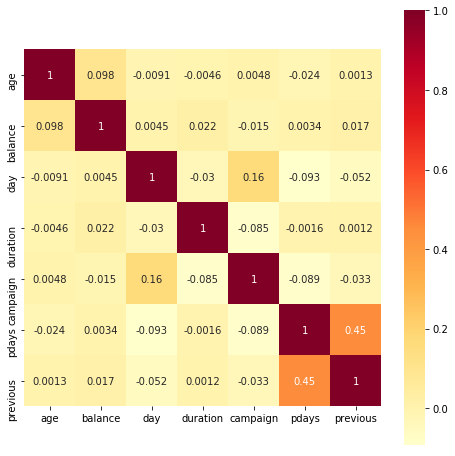

In [42]:
flatui = ["#9b59b6", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
hmap = df.corr()
plt.subplots(figsize=(8, 8))
sns.heatmap(hmap, vmax=1,annot=True,cmap='YlOrRd', square=True);

In [43]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc['yes','yes']
    TN = confusion.loc['no','no']
    FP = confusion.loc['no','yes']
    FN = confusion.loc['yes','no']

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out

In [44]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df_data_1hot, y, test_size=0.2)

In [23]:
#test area
print(r_forest_gini_pred[1])

no


In [47]:
############ Training on Full Dataset using RandomForest and checking the accuracy ############
# Gini
r_forest_gini = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_gini.fit(X_train, y_train)
r_forest_gini_pred = r_forest_gini.predict(X_test)
rforest_gini = model_eval(y_test, r_forest_gini_pred)

print('Random Forest using Gini Index : %.2f percent.' % (round(rforest_gini['accuracy']*100,2)))

# Entropy
r_forest_entropy = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_entropy.fit(X_train, y_train)
r_forest_entropy_pred = r_forest_entropy.predict(X_test)
rforest_entropy = model_eval(y_test, r_forest_entropy_pred)

print('Random Forest using Entropy : %.2f percent.' % (round(rforest_entropy['accuracy']*100,2)))

ovl_rf = round(pd.DataFrame([rforest_gini, rforest_entropy], index = ['rforest_gini','rforest_entropy']),4)
display(ovl_rf)

Random Forest using Gini Index : 89.79 percent.
Random Forest using Entropy : 89.94 percent.


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
rforest_gini,0.8979,0.1021,0.4490,0.6114,0.3547,0.3547,0.9701
rforest_entropy,0.8994,0.1006,0.4728,0.6126,0.3849,0.3849,0.9677


In [48]:
# Decision Tree classifier on original dataset - Without knowledge distillation
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
dTree = model_eval(y_test, y_pred)
print('Decision Tree Accuracy : %.2f percent.' % (round(dTree['accuracy']*100,2)))
ovl_rf = round(pd.DataFrame([dTree], index = ['dTree']),4)
display(ovl_rf)

Decision Tree Accuracy : 87.63 percent.


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
dTree,0.8763,0.1237,0.4734,0.4723,0.4745,0.4745,0.9296


In [49]:
def nparray_to_df(prob):
    return pd.DataFrame(data=prob,columns=['no','yes'])

In [50]:
# To create new dataset and perform knowledge distillation
r_forest_gini = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_gini.fit(X_train, y_train)
X_train_prob = r_forest_gini.predict_proba(X_train)
X_test_prob = r_forest_gini.predict_proba(X_test)

In [51]:
X_train_prob = nparray_to_df(X_train_prob)
X_test_prob = nparray_to_df(X_test_prob)

In [52]:
# Decision Tree classifier on original dataset - With knowledge distillation
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train_prob, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test_prob)
dTree = model_eval(y_test, y_pred)

print('Decision Tree Accuracy : %.2f percent.' % (round(dTree['accuracy']*100,2)))

ovl_rf = round(pd.DataFrame([dTree], index = ['dTree']),4)
display(ovl_rf)

Decision Tree Accuracy : 88.81 percent.


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
dTree,0.8881,0.1119,0.5005,0.5248,0.4783,0.4783,0.9425
